In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Listes des csv, se trouvant dans le dossier data
os.listdir("data/")

['a.pdf',
 'application_test.csv',
 'application_train.csv',
 'b.pdf',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [3]:
app_train = pd.read_csv('data/application_train.csv')

In [4]:
app_test = pd.read_csv('data/application_test.csv')

In [5]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 136 entries, Unnamed: 0.13 to Montant demandé à l'agence de crédit (année)
dtypes: float64(65), int64(55), object(16)
memory usage: 319.1+ MB


In [6]:
column_translation = {
    'SK_ID_CURR': 'Identifiant du client',
    'TARGET': 'Cible (0 = non défaut, 1 = défaut)',
    'NAME_CONTRACT_TYPE': 'Type de contrat',
    'CODE_GENDER': 'Code du genre',
    'FLAG_OWN_CAR': 'Indicateur de propriété d\'une voiture',
    'FLAG_OWN_REALTY': 'Indicateur de propriété immobilière',
    'CNT_CHILDREN': 'Nombre d\'enfants',
    'AMT_INCOME_TOTAL': 'Revenu total',
    'AMT_CREDIT': 'Montant du crédit',
    'AMT_ANNUITY': 'Montant de l\'annuité',
    'AMT_GOODS_PRICE': 'Prix des biens',
    'NAME_TYPE_SUITE': 'Type de suite',
    'NAME_INCOME_TYPE': 'Type de revenu',
    'NAME_EDUCATION_TYPE': 'Type d\'éducation',
    'NAME_FAMILY_STATUS': 'Statut familial',
    'NAME_HOUSING_TYPE': 'Type de logement',
    'REGION_POPULATION_RELATIVE': 'Population relative de la région',
    'DAYS_BIRTH': 'Jours depuis la naissance',
    'DAYS_EMPLOYED': 'Jours d\'emploi',
    'DAYS_REGISTRATION': 'Jours d\'enregistrement',
    'DAYS_ID_PUBLISH': 'Jours depuis la publication de l\'identité',
    'OWN_CAR_AGE': 'Âge de la voiture',
    'FLAG_MOBIL': 'Indicateur de mobile',
    'FLAG_EMP_PHONE': 'Indicateur de téléphone professionnel',
    'FLAG_WORK_PHONE': 'Indicateur de téléphone de travail',
    'FLAG_CONT_MOBILE': 'Indicateur de mobile de contact',
    'FLAG_PHONE': 'Indicateur de téléphone',
    'FLAG_EMAIL': 'Indicateur d\'email',
    'OCCUPATION_TYPE': 'Type d\'occupation',
    'CNT_FAM_MEMBERS': 'Nombre de membres de la famille',
    'REGION_RATING_CLIENT': 'Notation de la région du client',
    'REGION_RATING_CLIENT_W_CITY': 'Notation de la région du client avec la ville',
    'WEEKDAY_APPR_PROCESS_START': 'Jour de la semaine de début du processus',
    'HOUR_APPR_PROCESS_START': 'Heure de début du processus',
    'REG_REGION_NOT_LIVE_REGION': 'Région enregistrée différente de la région d\'habitation',
    'REG_REGION_NOT_WORK_REGION': 'Région enregistrée différente de la région de travail',
    'LIVE_REGION_NOT_WORK_REGION': 'Région d\'habitation différente de la région de travail',
    'REG_CITY_NOT_LIVE_CITY': 'Ville enregistrée différente de la ville d\'habitation',
    'REG_CITY_NOT_WORK_CITY': 'Ville enregistrée différente de la ville de travail',
    'LIVE_CITY_NOT_WORK_CITY': 'Ville d\'habitation différente de la ville de travail',
    'ORGANIZATION_TYPE': 'Type d\'organisation',
    'EXT_SOURCE_1': 'Source externe 1',
    'EXT_SOURCE_2': 'Source externe 2',
    'EXT_SOURCE_3': 'Source externe 3',
    'APARTMENTS_AVG': 'Moyenne des appartements',
    'BASEMENTAREA_AVG': 'Moyenne de la surface du sous-sol',
    'YEARS_BEGINEXPLUATATION_AVG': 'Moyenne des années de début d\'exploitation',
    'YEARS_BUILD_AVG': 'Moyenne des années de construction',
    'COMMONAREA_AVG': 'Moyenne de la surface commune',
    'ELEVATORS_AVG': 'Moyenne des ascenseurs',
    'ENTRANCES_AVG': 'Moyenne des entrées',
    'FLOORSMAX_AVG': 'Moyenne des étages maximum',
    'FLOORSMIN_AVG': 'Moyenne des étages minimum',
    'LANDAREA_AVG': 'Moyenne de la surface du terrain',
    'LIVINGAPARTMENTS_AVG': 'Moyenne des appartements habitables',
    'LIVINGAREA_AVG': 'Moyenne de la surface habitable',
    'NONLIVINGAPARTMENTS_AVG': 'Moyenne des appartements non habitables',
    'NONLIVINGAREA_AVG': 'Moyenne de la surface non habitable',
    'APARTMENTS_MODE': 'Mode des appartements',
    'BASEMENTAREA_MODE': 'Mode de la surface du sous-sol',
    'YEARS_BEGINEXPLUATATION_MODE': 'Mode des années de début d\'exploitation',
    'YEARS_BUILD_MODE': 'Mode des années de construction',
    'COMMONAREA_MODE': 'Mode de la surface commune',
    'ELEVATORS_MODE': 'Mode des ascenseurs',
    'ENTRANCES_MODE': 'Mode des entrées',
    'FLOORSMAX_MODE': 'Mode des étages maximum',
    'FLOORSMIN_MODE': 'Mode des étages minimum',
    'LANDAREA_MODE': 'Mode de la surface du terrain',
    'LIVINGAPARTMENTS_MODE': 'Mode des appartements habitables',
    'LIVINGAREA_MODE': 'Mode de la surface habitable',
    'NONLIVINGAPARTMENTS_MODE': 'Mode des appartements non habitables',
    'NONLIVINGAREA_MODE': 'Mode de la surface non habitable',
    'APARTMENTS_MEDI': 'Médiane des appartements',
    'BASEMENTAREA_MEDI': 'Médiane de la surface du sous-sol',
    'YEARS_BEGINEXPLUATATION_MEDI': 'Médiane des années de début d\'exploitation',
    'YEARS_BUILD_MEDI': 'Médiane des années de construction',
    'COMMONAREA_MEDI': 'Médiane de la surface commune',
    'ELEVATORS_MEDI': 'Médiane des ascenseurs',
    'ENTRANCES_MEDI': 'Médiane des entrées',
    'FLOORSMAX_MEDI': 'Médiane des étages maximum',
    'FLOORSMIN_MEDI': 'Médiane des étages minimum',
    'LANDAREA_MEDI': 'Médiane de la surface du terrain',
    'LIVINGAPARTMENTS_MEDI': 'Médiane des appartements habitables',
    'LIVINGAREA_MEDI': 'Médiane de la surface habitable',
    'NONLIVINGAPARTMENTS_MEDI': 'Médiane des appartements non habitables',
    'NONLIVINGAREA_MEDI': 'Médiane de la surface non habitable',
    'FONDKAPREMONT_MODE': 'Mode de Fondkapremont',
    'HOUSETYPE_MODE': 'Mode du type de maison',
    'TOTALAREA_MODE': 'Mode de la surface totale',
    'WALLSMATERIAL_MODE': 'Mode du matériau des murs',
    'EMERGENCYSTATE_MODE': 'Mode de l\'état d\'urgence',
    'OBS_30_CNT_SOCIAL_CIRCLE': 'Observations à 30 jours du cercle social',
    'DEF_30_CNT_SOCIAL_CIRCLE': 'Défauts à 30 jours du cercle social',
    'OBS_60_CNT_SOCIAL_CIRCLE': 'Observations à 60 jours du cercle social',
    'DEF_60_CNT_SOCIAL_CIRCLE': 'Défauts à 60 jours du cercle social',
    'DAYS_LAST_PHONE_CHANGE': 'Jours depuis le dernier changement de téléphone',
    'FLAG_DOCUMENT_2': 'Indicateur du document 2',
    'FLAG_DOCUMENT_3': 'Indicateur du document 3',
    'FLAG_DOCUMENT_4': 'Indicateur du document 4',
    'FLAG_DOCUMENT_5': 'Indicateur du document 5',
    'FLAG_DOCUMENT_6': 'Indicateur du document 6',
    'FLAG_DOCUMENT_7': 'Indicateur du document 7',
    'FLAG_DOCUMENT_8': 'Indicateur du document 8',
    'FLAG_DOCUMENT_9': 'Indicateur du document 9',
    'FLAG_DOCUMENT_10': 'Indicateur du document 10',
    'FLAG_DOCUMENT_11': 'Indicateur du document 11',
    'FLAG_DOCUMENT_12': 'Indicateur du document 12',
    'FLAG_DOCUMENT_13': 'Indicateur du document 13',
    'FLAG_DOCUMENT_14': 'Indicateur du document 14',
    'FLAG_DOCUMENT_15': 'Indicateur du document 15',
    'FLAG_DOCUMENT_16': 'Indicateur du document 16',
    'FLAG_DOCUMENT_17': 'Indicateur du document 17',
    'FLAG_DOCUMENT_18': 'Indicateur du document 18',
    'FLAG_DOCUMENT_19': 'Indicateur du document 19',
    'FLAG_DOCUMENT_20': 'Indicateur du document 20',
    'FLAG_DOCUMENT_21': 'Indicateur du document 21',
    'AMT_REQ_CREDIT_BUREAU_HOUR': 'Montant demandé à l\'agence de crédit (heure)',
    'AMT_REQ_CREDIT_BUREAU_DAY': 'Montant demandé à l\'agence de crédit (jour)',
    'AMT_REQ_CREDIT_BUREAU_WEEK': 'Montant demandé à l\'agence de crédit (semaine)',
    'AMT_REQ_CREDIT_BUREAU_MON': 'Montant demandé à l\'agence de crédit (mois)',
    'AMT_REQ_CREDIT_BUREAU_QRT': 'Montant demandé à l\'agence de crédit (trimestre)',
    'AMT_REQ_CREDIT_BUREAU_YEAR': 'Montant demandé à l\'agence de crédit (année)'
}

In [7]:
app_train = app_train.rename(columns=column_translation)

In [8]:
app_test = app_test.rename(columns=column_translation)

In [9]:
app_train = app_train.rename(columns={'TARGET': 'Cible (0 = non défaut, 1 = défaut)'})

In [10]:
app_test = app_test.rename(columns={'TARGET': 'Cible (0 = non défaut, 1 = défaut)'})

In [11]:
app_train.to_csv('data/application_train.csv')

In [12]:
app_test.to_csv('data/application_test.csv')

In [13]:
app_test.head()

,Unnamed: 0.12,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,...,Indicateur du document 18,Indicateur du document 19,Indicateur du document 20,Indicateur du document 21,Montant demandé à l'agence de crédit (heure),Montant demandé à l'agence de crédit (jour),Montant demandé à l'agence de crédit (semaine),Montant demandé à l'agence de crédit (mois),Montant demandé à l'agence de crédit (trimestre),Montant demandé à l'agence de crédit (année)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
app_train.head()

,Unnamed: 0.13,Unnamed: 0.12,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,...,Indicateur du document 18,Indicateur du document 19,Indicateur du document 20,Indicateur du document 21,Montant demandé à l'agence de crédit (heure),Montant demandé à l'agence de crédit (jour),Montant demandé à l'agence de crédit (semaine),Montant demandé à l'agence de crédit (mois),Montant demandé à l'agence de crédit (trimestre),Montant demandé à l'agence de crédit (année)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


-----------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')

## Importations des données

In [133]:
application_test_df = pd.read_csv('./Data/application_test.csv', sep=',', encoding='utf-8-sig')
application_train_df = pd.read_csv('./Data/application_train.csv', sep=',', encoding='utf-8-sig')

In [134]:
application_train_df = application_train_df.set_index('Identifiant du client')
application_test_df = application_test_df.set_index('Identifiant du client')
application_train_df.reset_index()
colonnes_a_supprimer = application_test_df.filter(regex='^Unnamed').columns
application_train_df = application_train_df.drop(columns=colonnes_a_supprimer)
application_test_df = application_test_df.drop(columns=colonnes_a_supprimer)

In [135]:
application_train_df.reset_index()
application_test_df.reset_index()

,Identifiant du client,Type de contrat,Code du genre,Indicateur de propriété d'une voiture,Indicateur de propriété immobilière,Nombre d'enfants,Revenu total,Montant du crédit,Montant de l'annuité,Prix des biens,...,Indicateur du document 18,Indicateur du document 19,Indicateur du document 20,Indicateur du document 21,Montant demandé à l'agence de crédit (heure),Montant demandé à l'agence de crédit (jour),Montant demandé à l'agence de crédit (semaine),Montant demandé à l'agence de crédit (mois),Montant demandé à l'agence de crédit (trimestre),Montant demandé à l'agence de crédit (année)
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [136]:
y = application_train_df['Cible (0 = non défaut, 1 = défaut)']

In [137]:
X  = application_train_df.loc[:, application_train_df.columns !=  'Cible (0 = non défaut, 1 = défaut)']

In [138]:

colonnes_categorielles = X.select_dtypes(include=['object']).columns
l = []
for i in colonnes_categorielles:
    l.append(i)

categorical_colums = l

print(colonnes_categorielles)


Index(['Type de contrat', 'Code du genre',
       'Indicateur de propriété d'une voiture',
       'Indicateur de propriété immobilière', 'Type de suite',
       'Type de revenu', 'Type d'éducation', 'Statut familial',
       'Type de logement', 'Type d'occupation',
       'Jour de la semaine de début du processus', 'Type d'organisation',
       'Mode de Fondkapremont', 'Mode du type de maison',
       'Mode du matériau des murs', 'Mode de l'état d'urgence'],
      dtype='object')


In [139]:
X = pd.get_dummies(X, columns = categorical_colums)

## Classement de Features.

In [140]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

RandomForestClassifier(random_state=0)

In [141]:
len(X.columns)

245

In [142]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.259 seconds


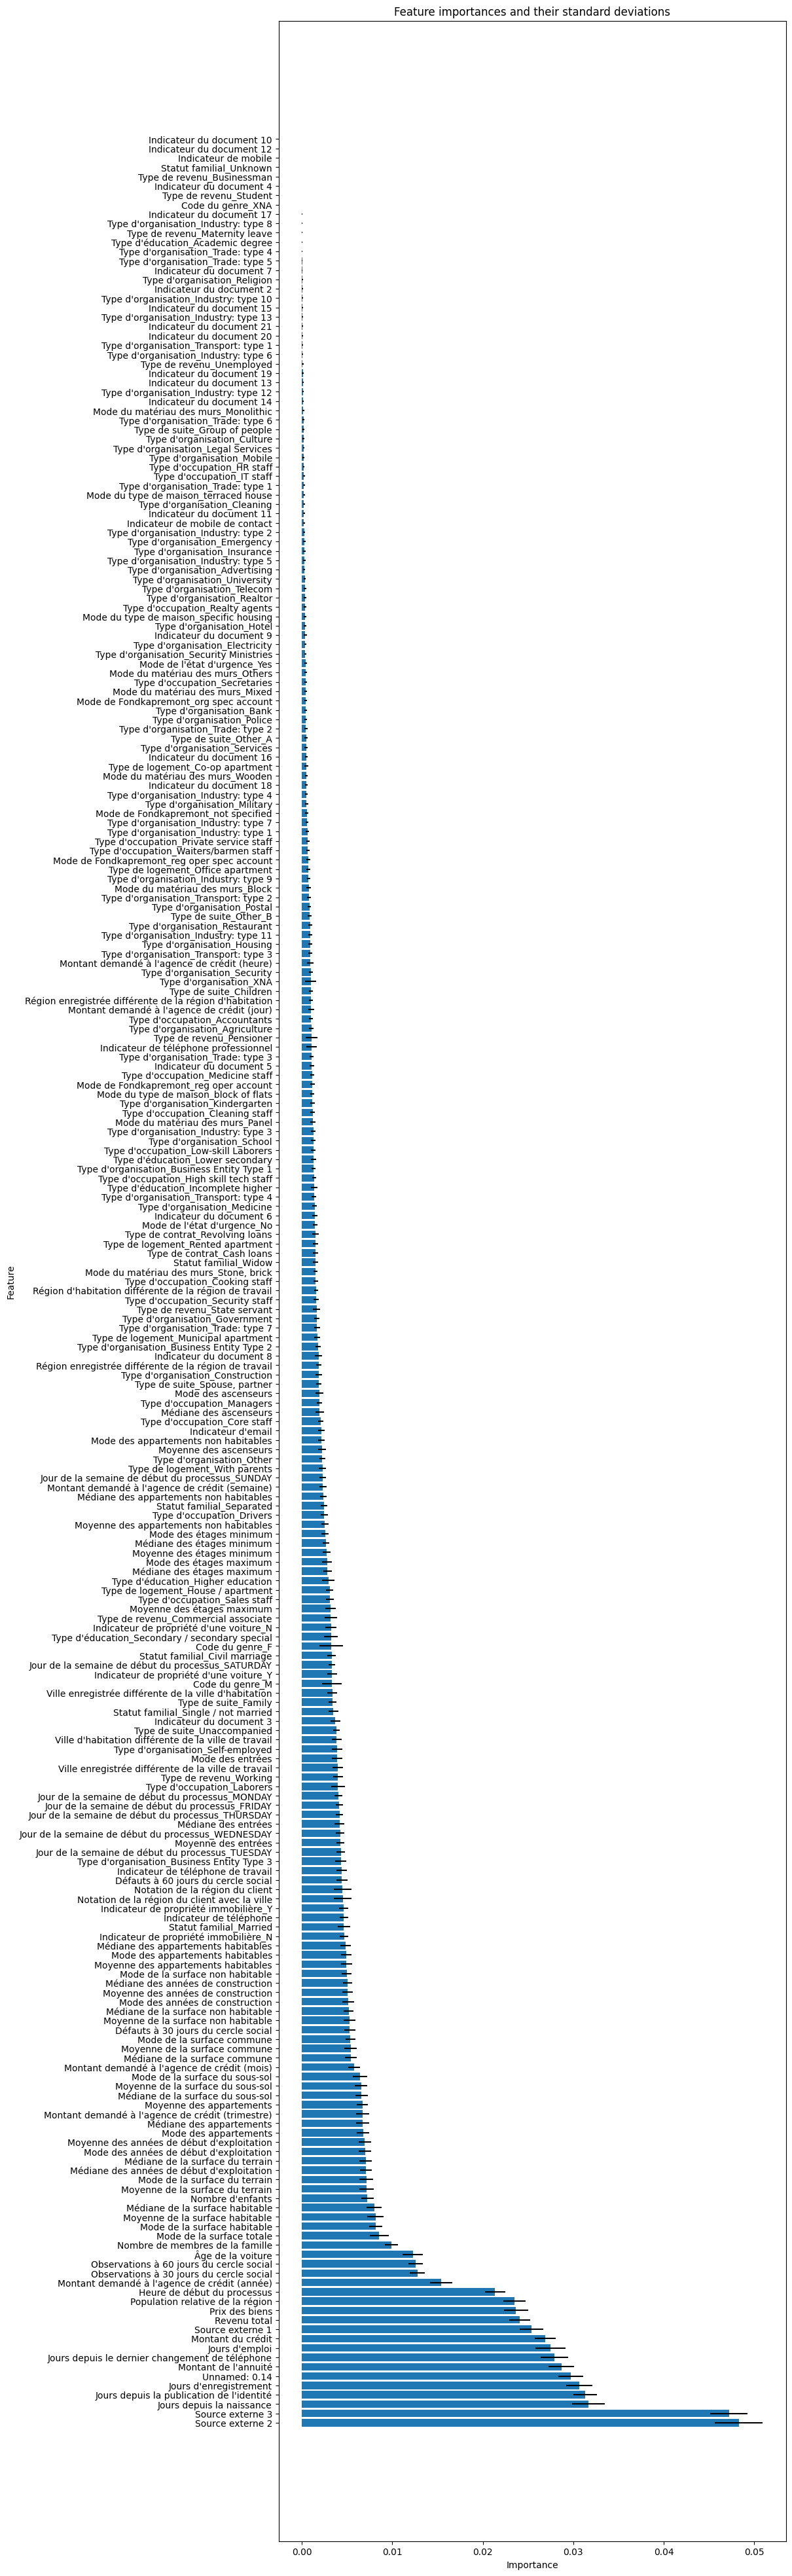

In [143]:
import matplotlib.pyplot as plt

# Créer un DataFrame pour l'importance des caractéristiques et leurs écarts-types
df_importances = pd.DataFrame({
    'feature': X.columns,  # Remplacez ceci par les noms de vos caractéristiques si vous les avez
    'importance': importances,
    'std': std
})

# Trier le DataFrame par importance
df_importances = df_importances.sort_values('importance', ascending=False)

# Créer un graphique à barres avec des barres d'erreur
plt.figure(figsize=(10, 50))  # Ajustez la taille du graphique selon vos besoins
plt.barh(df_importances['feature'], df_importances['importance'], xerr=df_importances['std'], align='center')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importances and their standard deviations')

plt.show()


In [144]:
application_train_df['Cible (0 = non défaut, 1 = défaut)']

Identifiant du client
100002    1
100003    0
100004    0
100006    0
100007    0
         ..
456251    0
456252    0
456253    0
456254    1
456255    0
Name: Cible (0 = non défaut, 1 = défaut), Length: 307511, dtype: int64

In [145]:
columns_list = [
 'Moyenne de la surface habitable',
 'Mode de la surface totale',
 'Mode de la surface habitable',
 'Observations à 30 jours du cercle social',
 'Observations à 60 jours du cercle social',
 'Âge de la voiture',
 'Montant demandé à l\'agence de crédit (année)',
 'Heure de début du processus',
 'Population relative de la région',
 'Revenu total',
 'Prix des biens',
 'Montant du crédit',
 'Montant de l\'annuité',
 'Jours depuis le dernier changement de téléphone',
 'Jours d\'emploi',
 'Jours d\'enregistrement',
 'Jours depuis la publication de l\'identité',
 'Source externe 1',
 'Jours depuis la naissance',
 'Source externe 2',
 'Source externe 3',
 'Cible (0 = non défaut, 1 = défaut)']

In [146]:
application_train_df = application_train_df[columns_list]
# application_test_df = application_test_df[columns_list]

In [147]:
X_train = application_train_df

In [148]:
correl = application_train_df.corr()
correl.head()

,Moyenne de la surface habitable,Mode de la surface totale,Mode de la surface habitable,Observations à 30 jours du cercle social,Observations à 60 jours du cercle social,Âge de la voiture,Montant demandé à l'agence de crédit (année),Heure de début du processus,Population relative de la région,Revenu total,...,Montant de l'annuité,Jours depuis le dernier changement de téléphone,Jours d'emploi,Jours d'enregistrement,Jours depuis la publication de l'identité,Source externe 1,Jours depuis la naissance,Source externe 2,Source externe 3,"Cible (0 = non défaut, 1 = défaut)"
Moyenne de la surface habitable,1.000000,0.925039,0.972050,-0.025963,-0.025608,-0.060352,-0.019041,0.084642,0.213491,0.039976,...,0.089659,-0.010645,-0.012438,0.007419,-0.011515,0.068201,-0.000334,0.097579,0.005634,-0.032997
Mode de la surface totale,0.925039,1.000000,0.899247,-0.025601,-0.025244,-0.061298,-0.018945,0.079712,0.202145,0.041985,...,0.090415,-0.008283,-0.015126,0.019495,-0.011153,0.066227,0.001329,0.094687,0.006232,-0.032596
Mode de la surface habitable,0.972050,0.899247,1.000000,-0.021320,-0.020959,-0.055302,-0.017190,0.075583,0.180932,0.034915,...,0.079426,-0.009607,-0.010847,0.007457,-0.012096,0.062046,-0.000020,0.086026,0.005437,-0.030685
Observations à 30 jours du cercle social,-0.025963,-0.025601,-0.021320,1.000000,0.998490,0.003649,0.032567,-0.008613,-0.011160,-0.013099,...,-0.011987,-0.014786,0.005734,0.009125,-0.012454,-0.025788,0.007425,-0.019235,-0.000419,0.009131
Observations à 60 jours du cercle social,-0.025608,-0.025244,-0.020959,0.998490,1.000000,0.003611,0.032957,-0.008518,-0.010638,-0.013015,...,-0.011731,-0.015202,0.005888,0.009088,-0.012874,-0.025351,0.007023,-0.018878,-0.000717,0.009022


Text(0.5, 1.0, 'Corrélation')

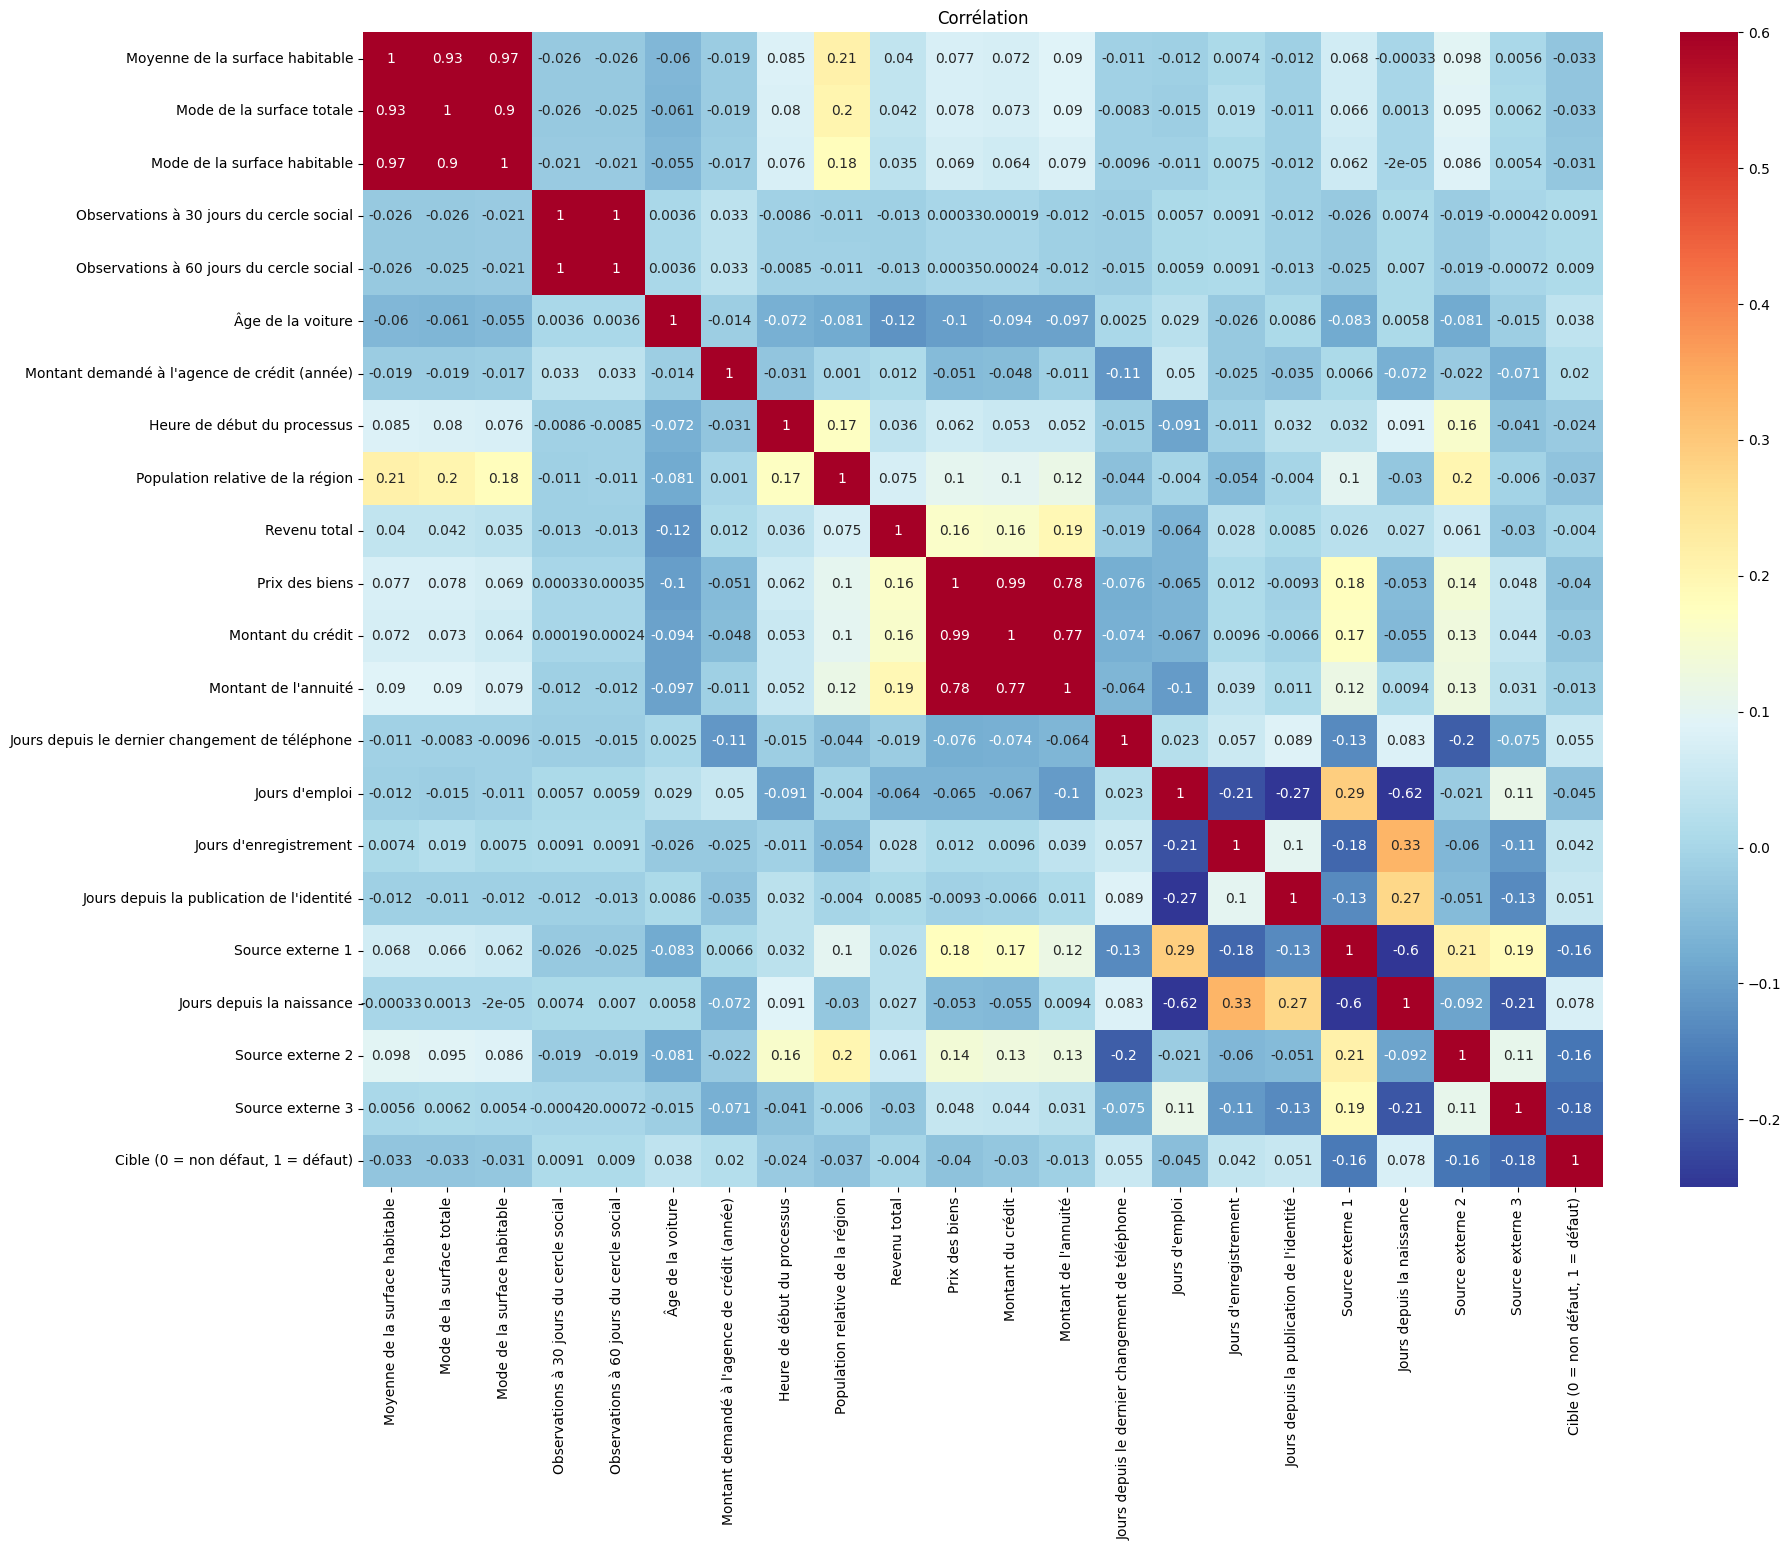

In [149]:
plt.figure(figsize = (20, 15))

sns.heatmap(correl , cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Corrélation')

In [150]:
variable_del = ['Moyenne de la surface habitable',
                      'Prix des biens',
                      'Montant de l\'annuité',
                      'Jours d\'emploi',
                      'Source externe 1']

application_train_df = application_train_df.drop(variable_del,axis=1)
application_test_df = application_test_df.drop(variable_del,axis=1)

In [151]:
y_train = application_train_df['Cible (0 = non défaut, 1 = défaut)']
X_train  = application_train_df.loc[:, application_train_df.columns !=  'Cible (0 = non défaut, 1 = défaut)']

In [152]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [153]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.167 seconds


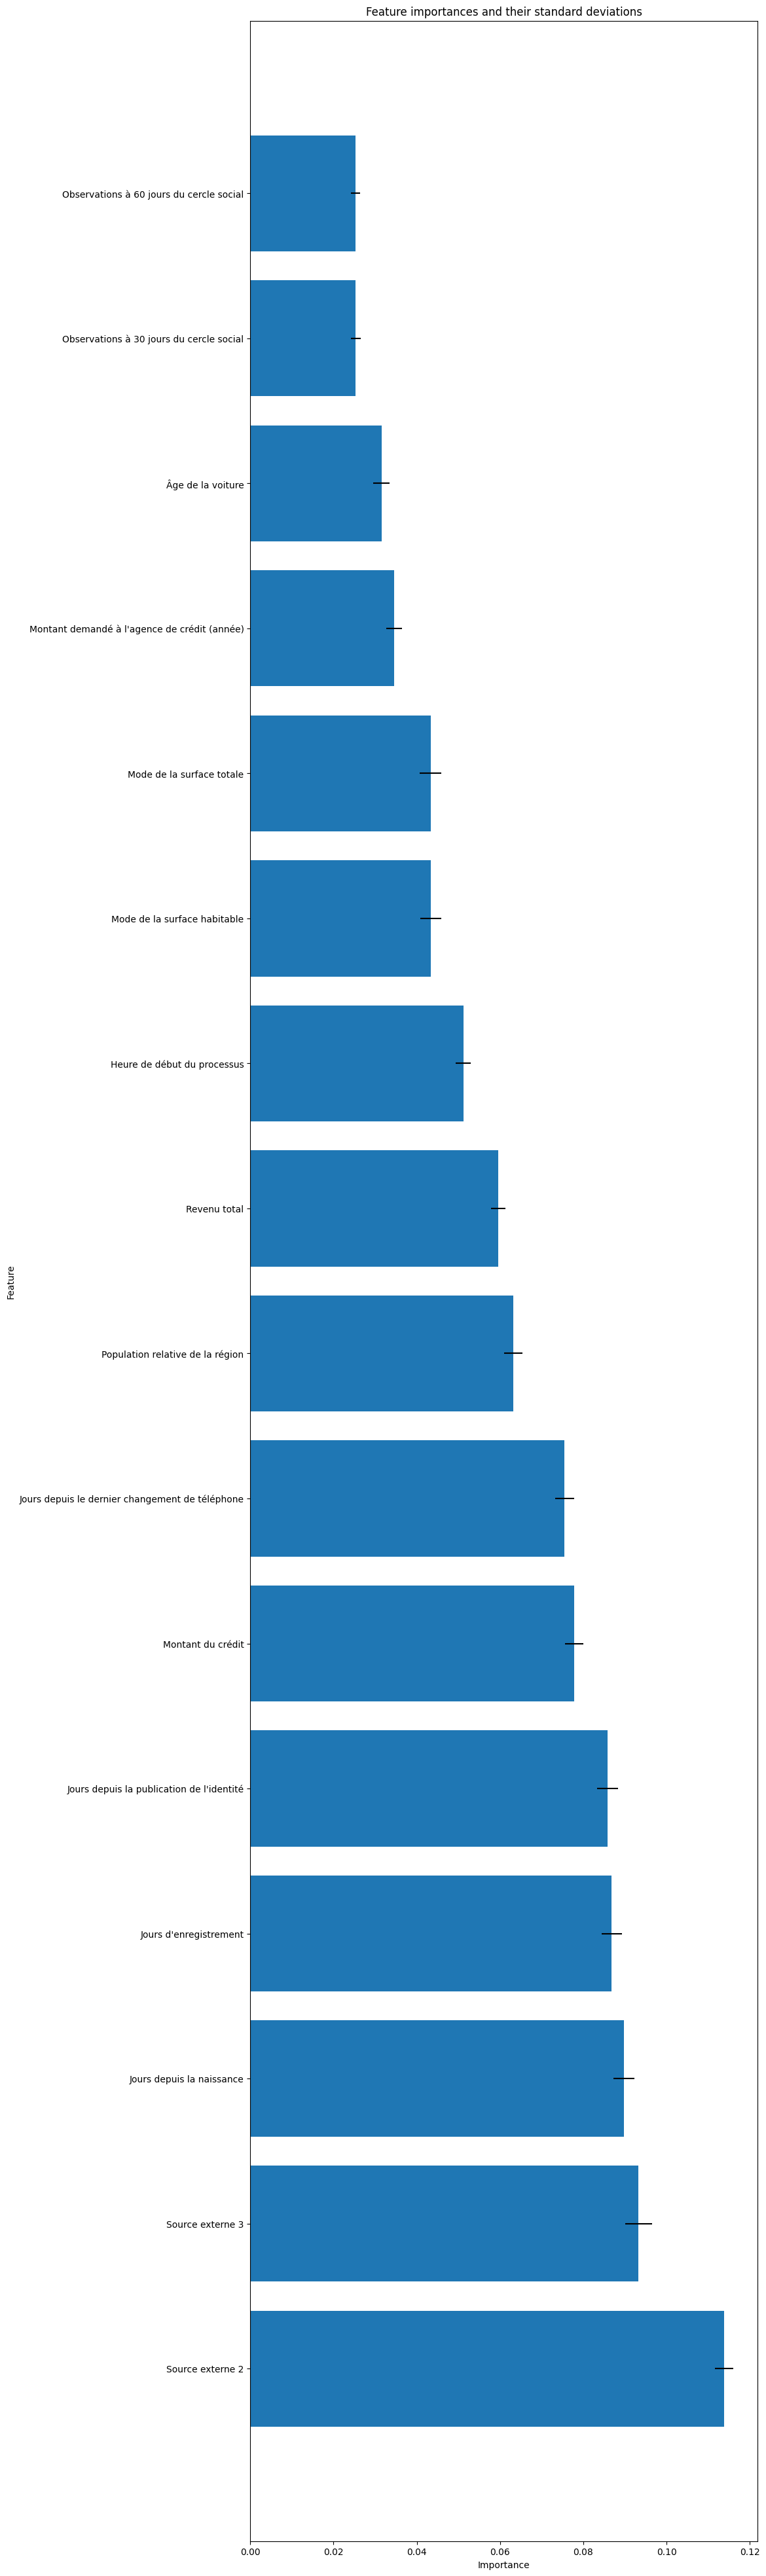

In [154]:
import matplotlib.pyplot as plt

# Créer un DataFrame pour l'importance des caractéristiques et leurs écarts-types
df_importances = pd.DataFrame({
    'feature': X_train.columns,  # Remplacez ceci par les noms de vos caractéristiques si vous les avez
    'importance': importances,
    'std': std
})

# Trier le DataFrame par importance
df_importances = df_importances.sort_values('importance', ascending=False)

# Créer un graphique à barres avec des barres d'erreur
plt.figure(figsize=(10, 50))  # Ajustez la taille du graphique selon vos besoins
plt.barh(df_importances['feature'], df_importances['importance'], xerr=df_importances['std'], align='center')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importances and their standard deviations')

plt.show()


In [15]:
X_train = pd.read_csv('data/X_train.csv',sep=',')
y_train = pd.read_csv('data/y_train.csv',sep=',')

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=1000,        # Nombre d'arbres dans la forêt
    max_depth=20,            # Profondeur maximale des arbres
    min_samples_split=20,    # Nombre minimal d'échantillons pour diviser un nœud
    min_samples_leaf=10,     # Nombre minimal d'échantillons dans une feuille
    max_features='sqrt',     # Nombre de features à considérer à chaque division
    oob_score=True,          # Utiliser le score OOB pour évaluer le modèle
    random_state=42,         # Initialiser le générateur de nombres aléatoires
    n_jobs=-1                # Utiliser tous les cœurs de calcul disponibles
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=42)

In [68]:
y_train_pred = rf_model.predict(X_train)

La précision (precision) est une métrique clé en classification qui mesure la proportion de vrais positifs parmi tous les éléments prédits comme positifs. Elle se calcule comme suit :
Précision = Vrais Positifs / (Vrais Positifs + Faux Positifs)

In [69]:
from sklearn.metrics import precision_score

precision = precision_score(y_train, y_train_pred)
print(f"La précision est de : {precision:.2f}")

La précision est de : 0.83


La précision (accuracy) est une métrique clé en classification qui mesure la proportion d'éléments correctement prédits par rapport à l'ensemble des éléments.

In [70]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_train_pred)
print(f"La précision est de : {accuracy:.2f}")

La précision est de : 0.82


Le recall (rappel) est une métrique clé en classification qui mesure la proportion d'éléments positifs correctement prédits par rapport à l'ensemble des éléments positifs réels. Il se calcule comme suit :
Recall = Vrais Positifs / (Vrais Positifs + Faux Négatifs)

In [71]:
from sklearn.metrics import recall_score


recall = recall_score(y_train, y_train_pred)
print(f"Le recall est de : {recall:.2f}")

Le recall est de : 0.82


Le f1_score est une métrique très utile pour évaluer les performances des modèles de classification, en particulier lorsque les classes sont déséquilibrées. Il combine la précision (precision) et le rappel (recall) en une seule valeur comprise entre 0 et 1.

In [72]:
from sklearn.metrics import f1_score


f1 = f1_score(y_train, y_train_pred)
print(f"Le f1_score est de : {f1:.2f}")

Le f1_score est de : 0.82


In [12]:
# # Récupérer le nombre total d'éléments avec Cible = 0
# total_0 = y_train[y_train == 0].shape[0]

# # Calculer le nombre d'éléments à supprimer pour avoir 24825 éléments avec Cible = 0
# nb_to_drop = total_0 - 24825

# # Sélectionner aléatoirement les index des éléments à supprimer
# indexes_to_drop = y_train[y_train == 0].sample(n=nb_to_drop, random_state=42).index


In [13]:
# # Supprimer ces lignes de y_train
# y_train = y_train.drop(indexes_to_drop)

In [14]:
# X_train = X_train.drop(indexes_to_drop)

In [241]:
# X_train.reset_index()
# y_train.reset_index()

,Identifiant du client,"Cible (0 = non défaut, 1 = défaut)"
0,100002,1
1,100009,0
2,100020,0
3,100023,0
4,100031,1
...,...,...
49645,456235,0
49646,456244,0
49647,456247,0
49648,456249,0


In [242]:
# X_train.to_csv('data/X_train.csv',index=False)
# y_train.to_csv('data/y_train.csv',index=False)